In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Loading the Diabetes dataset

In [219]:
df=pd.read_csv("diabetes_dataset.csv")
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,40.0,0,0,10.98,8.8,280,1
1,Male,38.0,1,0,64.52,7.5,300,1
2,Male,50.0,0,0,27.32,6.5,130,0
3,Female,39.0,0,0,30.00,6.6,200,0
4,Female,50.0,0,0,20.94,5.0,90,0
...,...,...,...,...,...,...,...,...
1495,Female,47.0,0,0,35.65,8.2,300,1
1496,Male,40.0,0,0,27.32,8.8,260,1
1497,Male,26.0,0,0,27.32,6.5,80,0
1498,Male,71.0,0,0,41.43,6.2,159,1


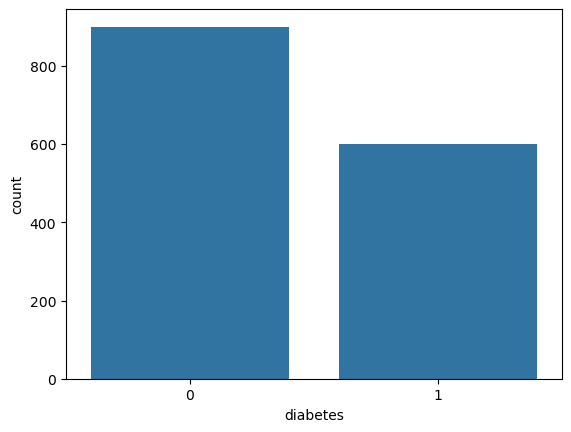

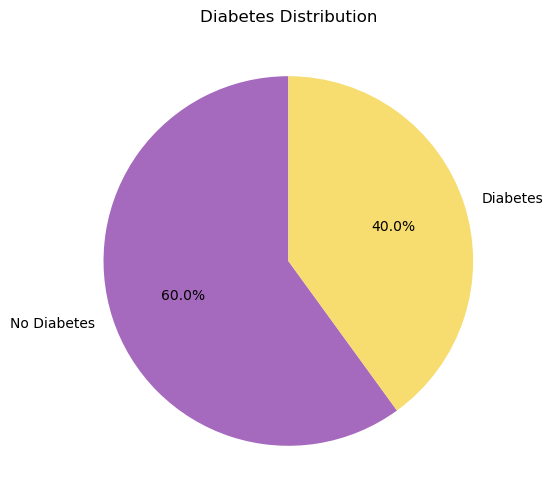

In [220]:
sns.countplot(x='diabetes', data=df) 

plt.figure(figsize=(6,6))
df['diabetes'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                      labels=['No Diabetes', 'Diabetes'],
                                      colors=['#a569bd','#f7dc6f'])
plt.ylabel('')
plt.title('Diabetes Distribution')
plt.show()

In [221]:
df.shape

(1500, 8)

In [222]:
df.sample(5)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
624,Female,14.0,0,0,21.11,6.2,126,0
352,Female,28.0,0,0,21.63,6.6,158,0
1063,Male,69.0,0,0,27.32,4.0,140,0
1287,Female,3.0,0,0,19.22,5.8,80,0
574,Male,70.0,0,1,25.64,4.5,145,0


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               1500 non-null   object 
 1   age                  1500 non-null   float64
 2   hypertension         1500 non-null   int64  
 3   heart_disease        1500 non-null   int64  
 4   bmi                  1500 non-null   float64
 5   HbA1c_level          1500 non-null   float64
 6   blood_glucose_level  1500 non-null   int64  
 7   diabetes             1500 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 93.9+ KB


In [224]:
df['age'] = df['age'].astype(int)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               1500 non-null   object 
 1   age                  1500 non-null   int64  
 2   hypertension         1500 non-null   int64  
 3   heart_disease        1500 non-null   int64  
 4   bmi                  1500 non-null   float64
 5   HbA1c_level          1500 non-null   float64
 6   blood_glucose_level  1500 non-null   int64  
 7   diabetes             1500 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 93.9+ KB


In [226]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,48.804000,0.131333,0.086000,28.880080,5.990067,157.395333,0.400000
std,21.846795,0.337877,0.280458,7.315869,1.261479,56.007401,0.490061
min,0.000000,0.000000,0.000000,10.300000,3.500000,80.000000,0.000000
25%,33.000000,0.000000,0.000000,25.157500,5.000000,126.000000,0.000000
50%,52.000000,0.000000,0.000000,27.320000,6.100000,150.000000,0.000000
75%,66.000000,0.000000,0.000000,32.040000,6.600000,160.000000,1.000000
max,80.000000,1.000000,1.000000,70.960000,9.000000,300.000000,1.000000


In [227]:
df.duplicated().sum()

np.int64(2)

In [228]:
df = df.drop_duplicates()

In [229]:
df.shape

(1498, 8)

In [230]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [231]:
df['age'].replace(0,np.nan,inplace=True)

In [232]:
df.isnull().sum()

gender                 0
age                    5
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [233]:
df.dropna(inplace=True)

In [234]:
df.shape

(1493, 8)

In [235]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## EDA

### Univariate Analysis Of Numerical Feature

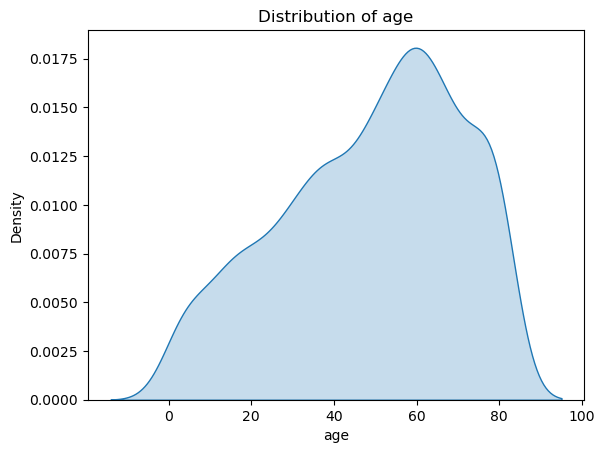

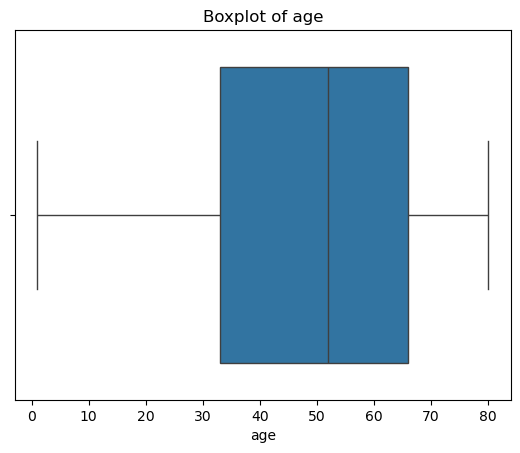

In [236]:
#Kde Plot
sns.kdeplot(data=df,x='age',fill=True)
plt.title('Distribution of age')
plt.show()

#BoxPlot
sns.boxplot(x=df['age'])
plt.title('Boxplot of age')
plt.show()

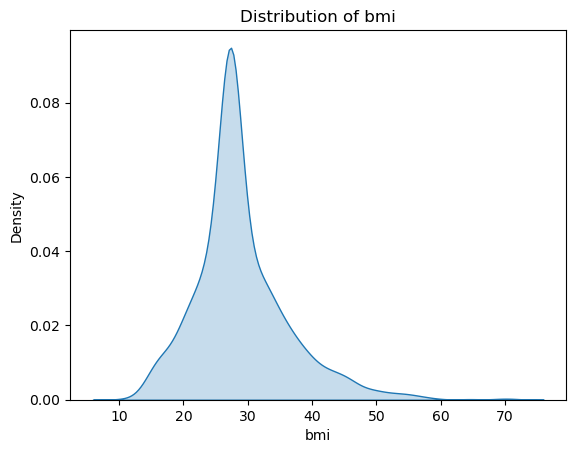

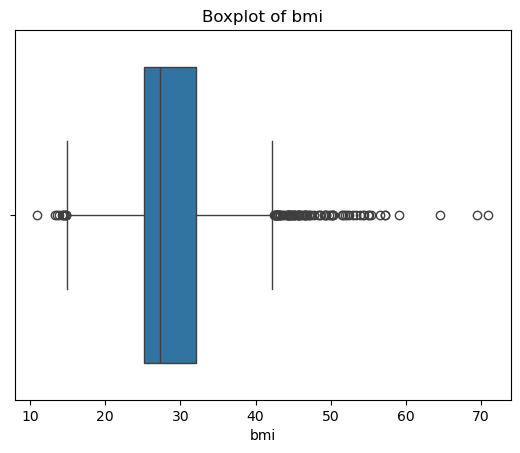

In [237]:
#Kde Plot
sns.kdeplot(data=df,x='bmi',fill=True)
plt.title('Distribution of bmi')
plt.show()

#BoxPlot
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of bmi')
plt.show()

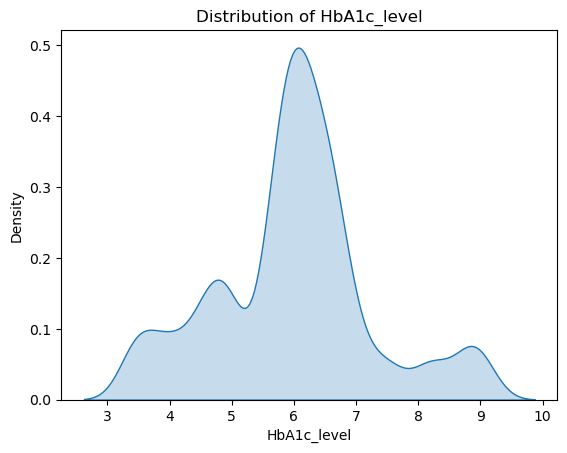

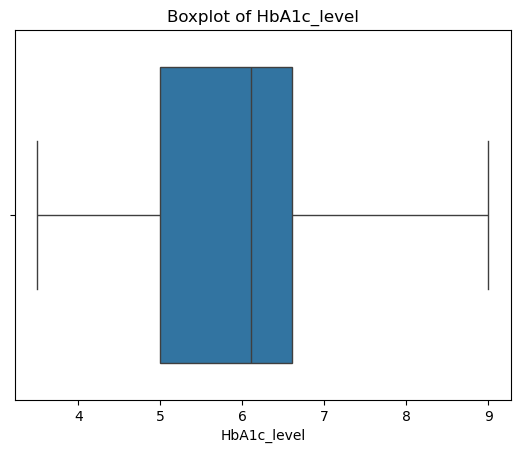

In [238]:
#Kde Plot
sns.kdeplot(data=df,x='HbA1c_level',fill=True)
plt.title('Distribution of HbA1c_level')
plt.show()

#BoxPlot
sns.boxplot(x=df['HbA1c_level'])
plt.title('Boxplot of HbA1c_level')
plt.show()

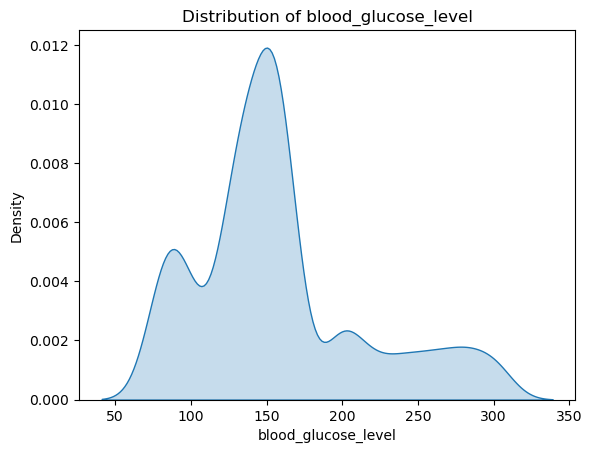

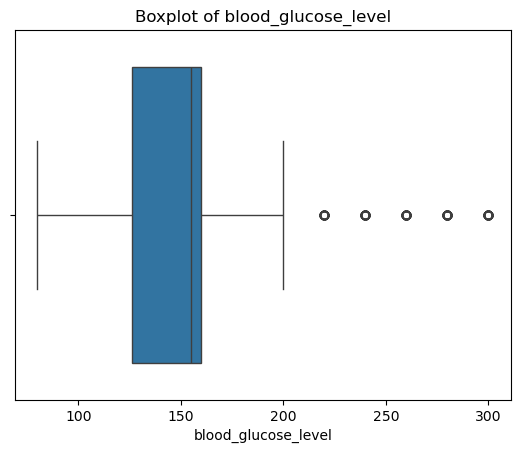

In [239]:
#Kde Plot
sns.kdeplot(data=df,x='blood_glucose_level',fill=True)
plt.title('Distribution of blood_glucose_level')
plt.show()

#BoxPlot
sns.boxplot(x=df['blood_glucose_level'])
plt.title('Boxplot of blood_glucose_level')
plt.show()

### univariate Analysis on Categorical Column

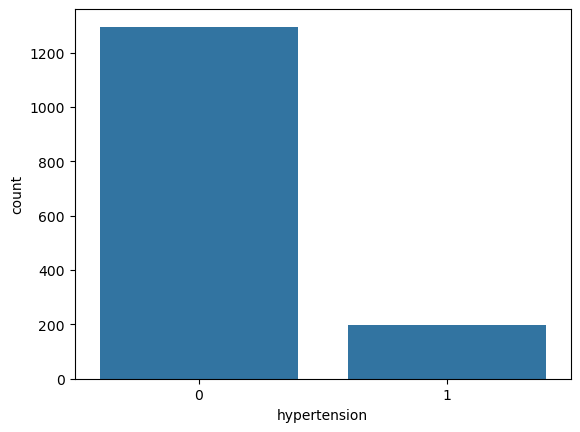

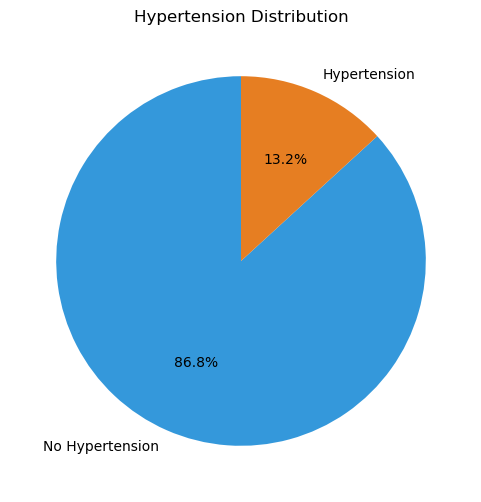

In [240]:
sns.countplot(x='hypertension', data=df)
plt.figure(figsize=(6,6))
df['hypertension'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                           labels=['No Hypertension', 'Hypertension'],
                                           colors=['#3498db','#e67e22'])
plt.ylabel('')
plt.title('Hypertension Distribution')
plt.show()

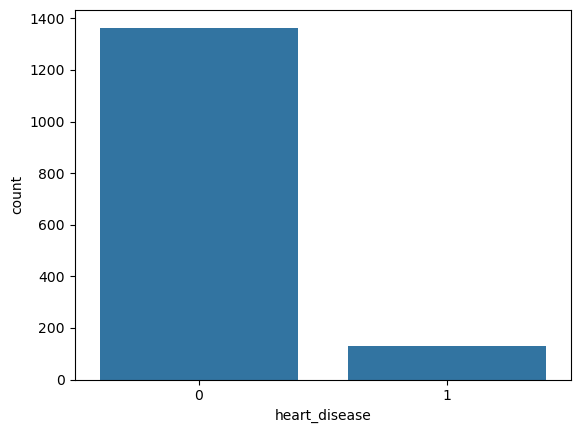

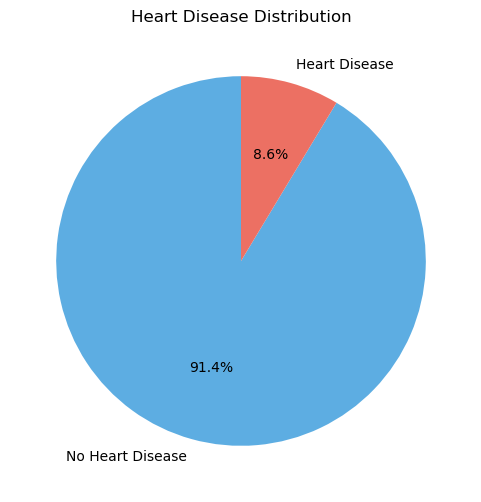

In [241]:
sns.countplot(x='heart_disease', data=df)

plt.figure(figsize=(6,6))
df['heart_disease'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                           labels=['No Heart Disease', 'Heart Disease'],
                                           colors=['#5dade2','#ec7063'])
plt.ylabel('')
plt.title('Heart Disease Distribution')
plt.show()

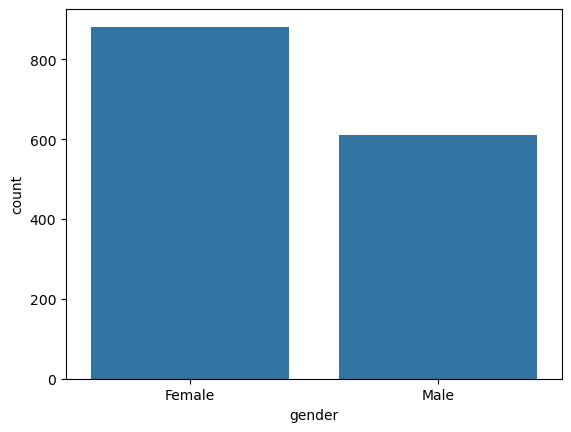

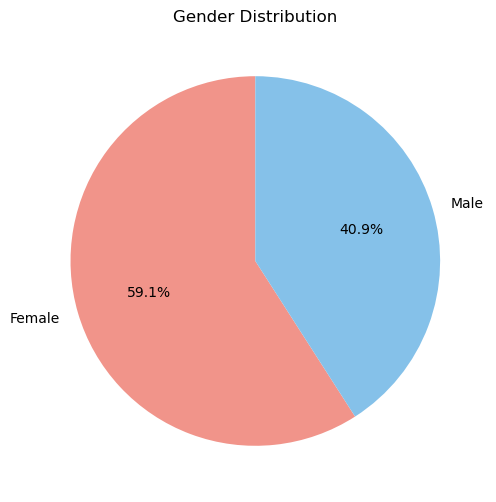

In [242]:
sns.countplot(x='gender', data=df)

plt.figure(figsize=(6,6))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                    colors=['#f1948a','#85c1e9'])
plt.ylabel('')
plt.title('Gender Distribution')
plt.show()

### Bivariate and Multivariate Analysis

### Numerical vs Numerical plots

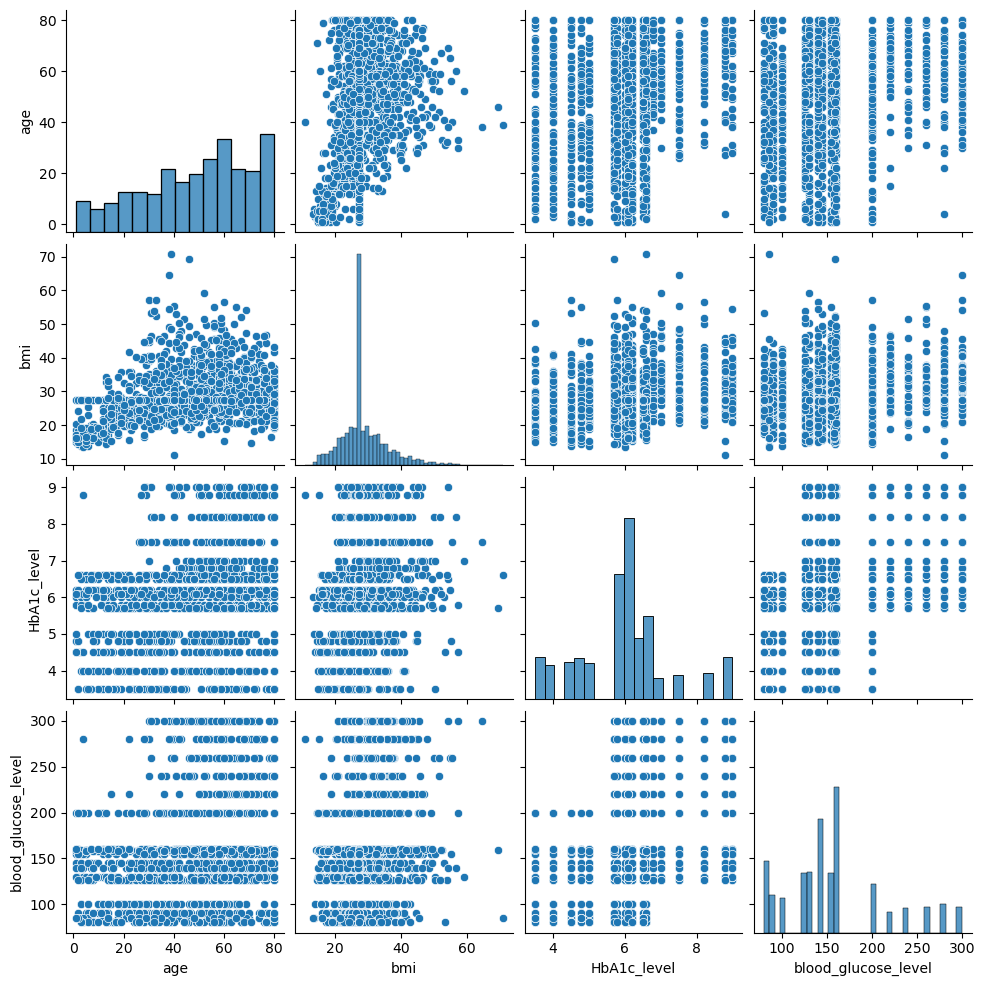

In [243]:
sns.pairplot(df[['age', 'bmi', 'HbA1c_level','blood_glucose_level']], palette='Set1')
plt.show()

<Axes: xlabel='age', ylabel='bmi'>

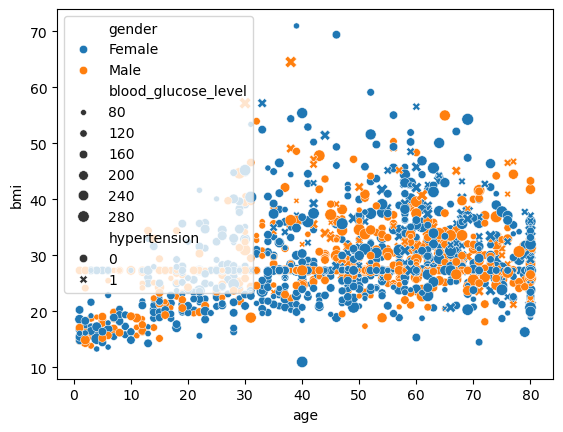

In [244]:
sns.scatterplot(x=df['age'], y=df['bmi'], hue=df['gender'], style=df['hypertension'], size=df['blood_glucose_level'])



### Numerical vs Categorical plots

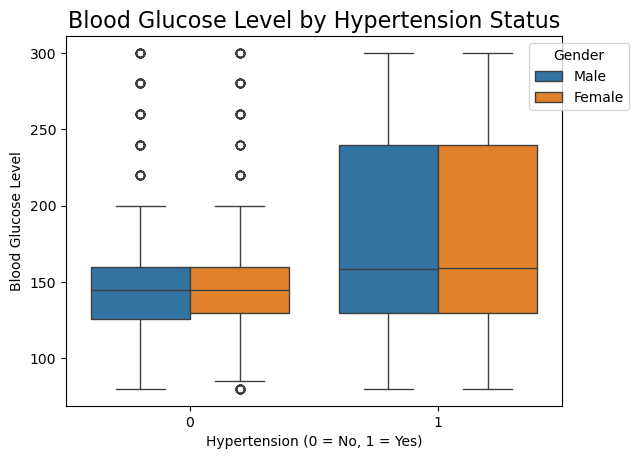

In [245]:
sns.boxplot(x='hypertension', y='blood_glucose_level',hue='gender', data=df)
plt.title('Blood Glucose Level by Hypertension Status', fontsize=16)
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Blood Glucose Level')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["Male", "Female"], title="Gender", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

age_group
41-60     451
61-80     429
21-40     297
0-20      193
81-100    123
Name: count, dtype: int64


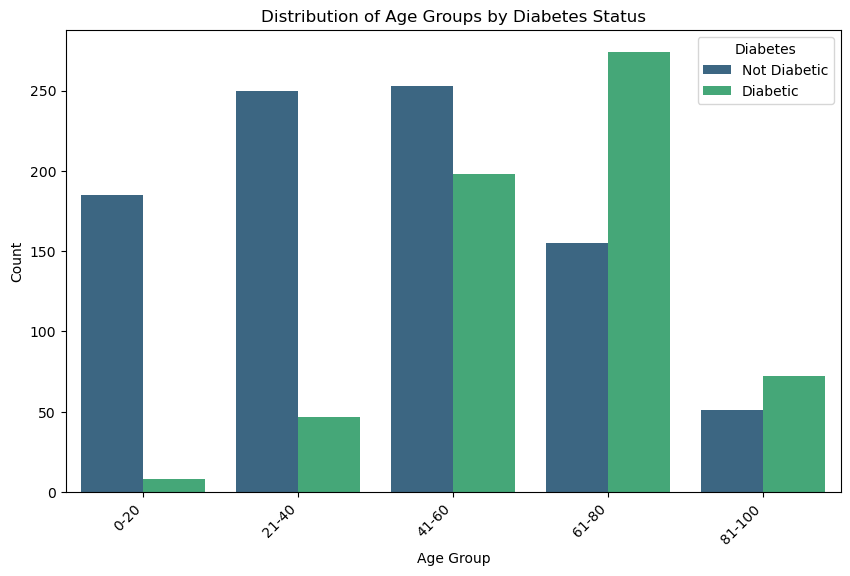

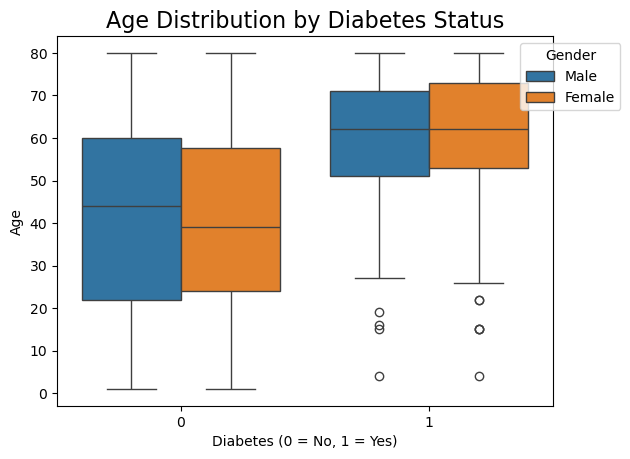

In [246]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
print(df['age_group'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='diabetes', data=df, order=age_labels, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups by Diabetes Status')
plt.legend(title='Diabetes', loc='upper right', labels=['Not Diabetic', 'Diabetic'])
plt.show()

sns.boxplot(x='diabetes', y='age',hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status', fontsize=16)
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Age')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["Male", "Female"], title="Gender", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()


age_group
41-60     451
61-80     429
21-40     297
0-20      193
81-100    123
Name: count, dtype: int64


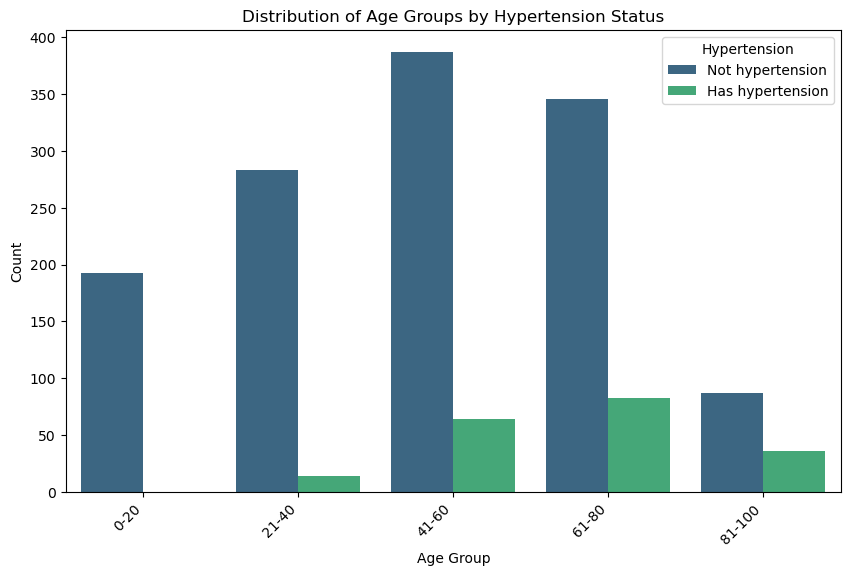

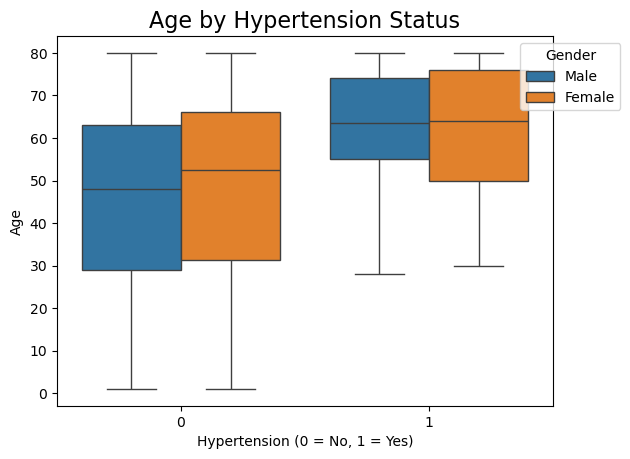

In [247]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
print(df['age_group'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='hypertension', data=df, order=age_labels, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups by Hypertension Status')
plt.legend(title='Hypertension', loc='upper right', labels=['Not hypertension', 'Has hypertension'])
plt.show()

sns.boxplot(x='hypertension', y='age',hue='gender', data=df)
plt.title('Age by Hypertension Status', fontsize=16)
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Age')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["Male", "Female"], title="Gender", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

age_group
41-60     451
61-80     429
21-40     297
0-20      193
81-100    123
Name: count, dtype: int64


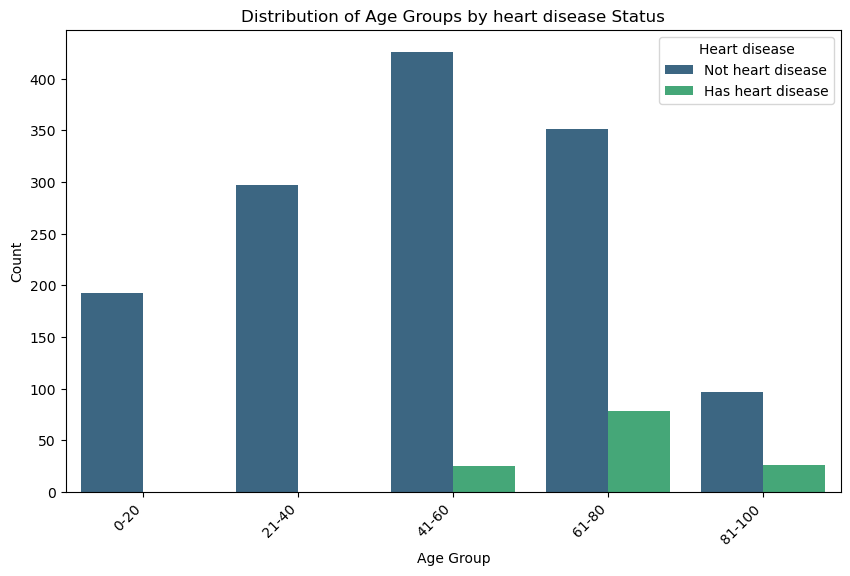

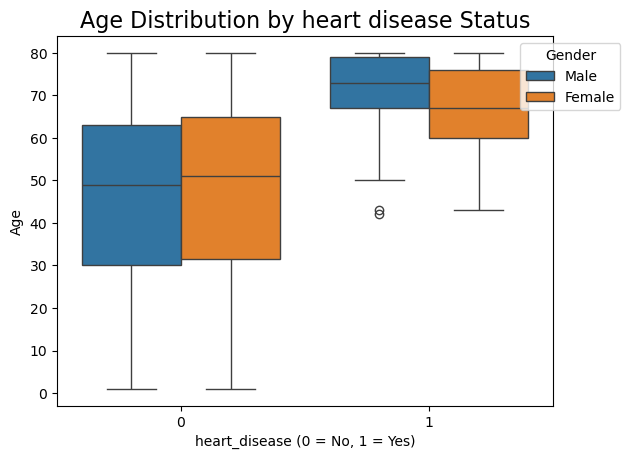

In [248]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
print(df['age_group'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='heart_disease', data=df, order=age_labels, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups by heart disease Status')
plt.legend(title='Heart disease', loc='upper right', labels=['Not heart disease', 'Has heart disease'])
plt.show()

sns.boxplot(x='heart_disease', y='age',hue='gender', data=df)
plt.title('Age Distribution by heart disease Status', fontsize=16)
plt.xlabel('heart_disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["Male", "Female"], title="Gender", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()


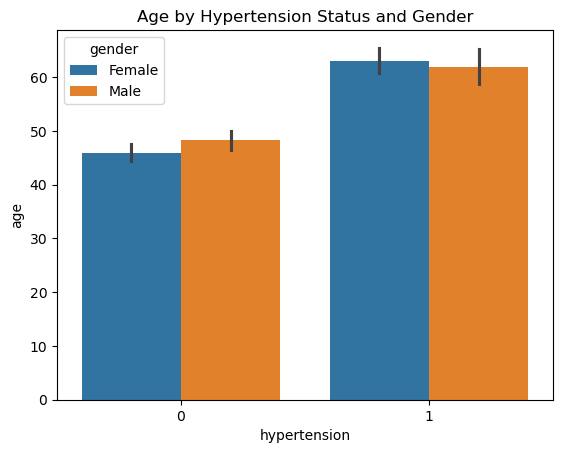

In [249]:
sns.barplot(x='hypertension', y='age', hue='gender', data=df)
plt.title('Age by Hypertension Status and Gender')
plt.show()

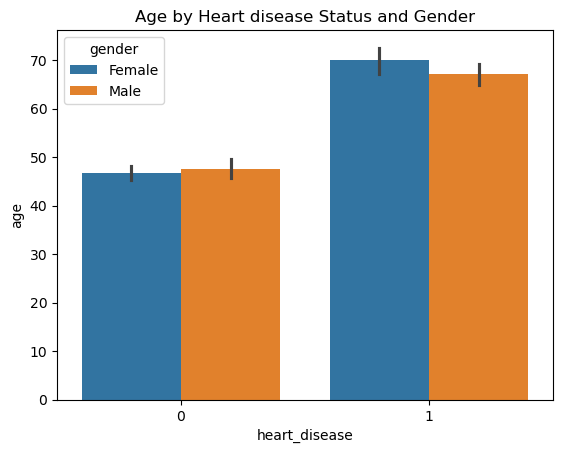

In [250]:
sns.barplot(x='heart_disease', y='age', hue='gender', data=df)
plt.title('Age by Heart disease Status and Gender')
plt.show()

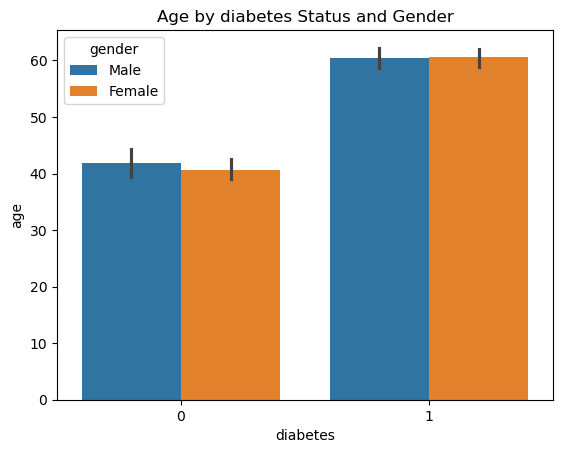

In [251]:
sns.barplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age by diabetes Status and Gender')
plt.show()

### Categorical vs Categorical plots

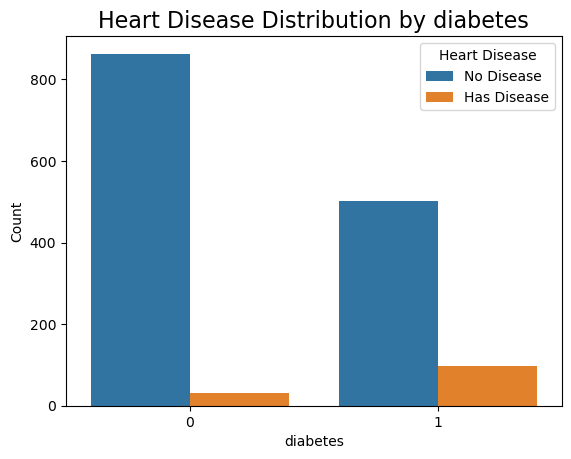

In [252]:
sns.countplot(x='diabetes', hue='heart_disease', data=df)
plt.title('Heart Disease Distribution by diabetes', fontsize=16)
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No Disease', 'Has Disease'])
plt.show()

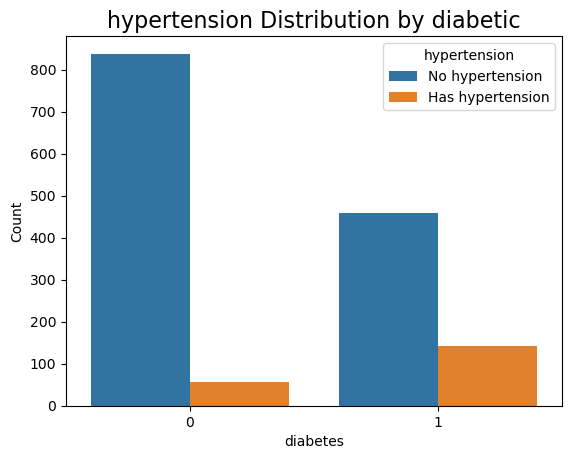

In [253]:
sns.countplot(x='diabetes', hue='hypertension', data=df)
plt.title('hypertension Distribution by diabetic', fontsize=16)
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.legend(title='hypertension', loc='upper right', labels=['No hypertension', 'Has hypertension'])
plt.show()

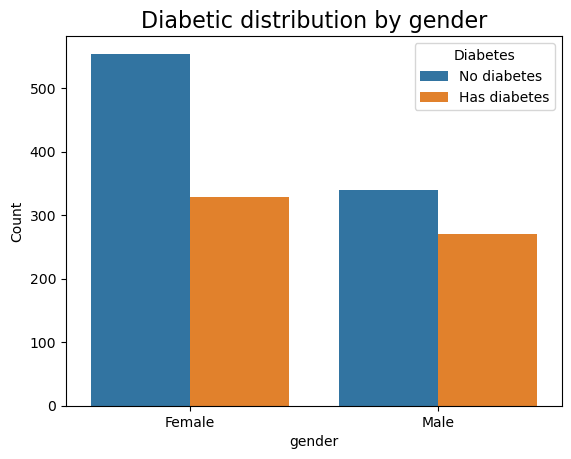

In [254]:
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Diabetic distribution by gender', fontsize=16)
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', loc='upper right', labels=['No diabetes', 'Has diabetes'])
plt.show()

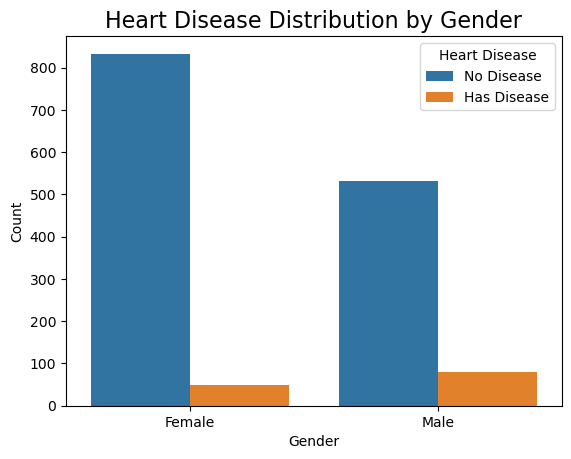

In [255]:
sns.countplot(x='gender', hue='heart_disease', data=df)
plt.title('Heart Disease Distribution by Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No Disease', 'Has Disease'])
plt.show()

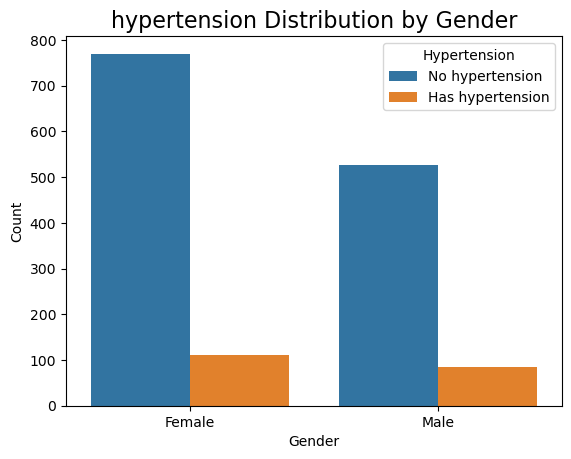

In [256]:
sns.countplot(x='gender', hue='hypertension', data=df)
plt.title('hypertension Distribution by Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Hypertension', loc='upper right', labels=['No hypertension', 'Has hypertension'])
plt.show()

<Axes: xlabel='diabetes', ylabel='gender'>

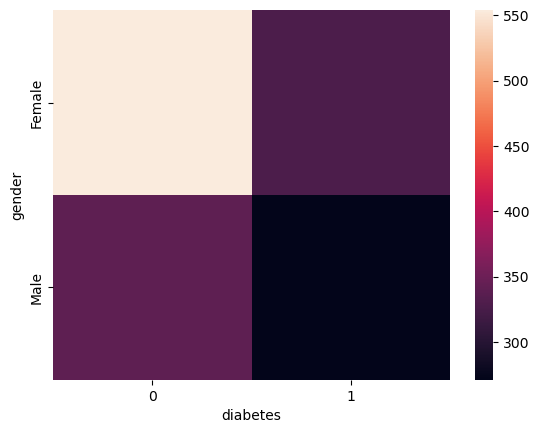

In [257]:
sns.heatmap(pd.crosstab(df['gender'], df['diabetes']))

<Axes: xlabel='diabetes', ylabel='hypertension'>

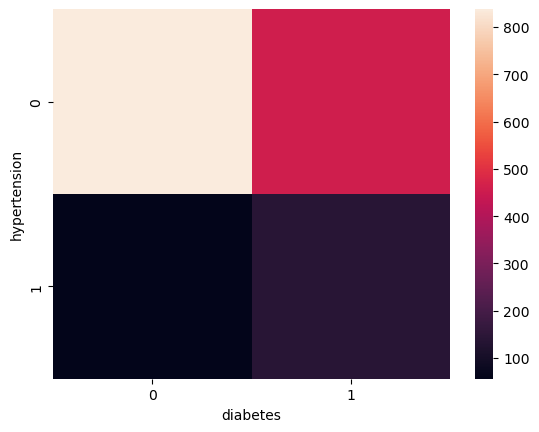

In [258]:
sns.heatmap(pd.crosstab(df['hypertension'], df['diabetes']))

<Axes: xlabel='diabetes', ylabel='heart_disease'>

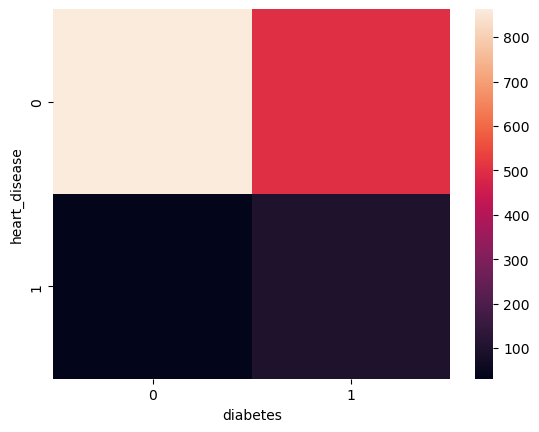

In [259]:
sns.heatmap(pd.crosstab(df['heart_disease'], df['diabetes']))

## Removing Outlier

In [260]:
# bmi 
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['bmi'] = df['bmi'].clip(lower=lower_bound, upper=upper_bound)

In [261]:
# blood_glucose_level 
Q1 = df['blood_glucose_level'].quantile(0.25)
Q3 = df['blood_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['blood_glucose_level'] = df['blood_glucose_level'].clip(lower=lower_bound, upper=upper_bound)

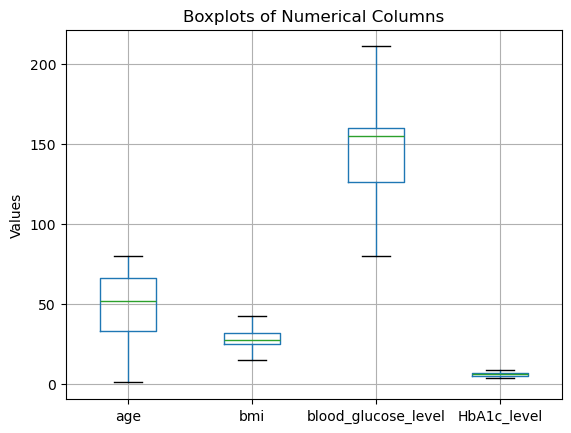

In [262]:
cols = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level'] 

df[cols].boxplot()
plt.title('Boxplots of Numerical Columns')
plt.ylabel('Values')
plt.show()

In [263]:
df.shape

(1493, 9)

## ONE HOT ENCODING

In [264]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['gender']

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_array = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

df.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,gender_Male
0,40.0,0.0,0.0,14.875,8.8,211.0,1.0,41-60,0.0
1,38.0,1.0,0.0,42.355,7.5,211.0,1.0,21-40,1.0
2,50.0,0.0,0.0,27.320,6.5,130.0,0.0,41-60,1.0
3,39.0,0.0,0.0,30.000,6.6,200.0,0.0,21-40,0.0
4,50.0,0.0,0.0,20.940,5.0,90.0,0.0,41-60,0.0


In [265]:
df.rename(columns={'gender_Male': 'gender'}, inplace=True)
df.drop('age_group', axis=1, inplace=True)

In [266]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender
0,40.0,0.0,0.0,14.875,8.8,211.0,1.0,0.0
1,38.0,1.0,0.0,42.355,7.5,211.0,1.0,1.0
2,50.0,0.0,0.0,27.320,6.5,130.0,0.0,1.0
3,39.0,0.0,0.0,30.000,6.6,200.0,0.0,0.0
4,50.0,0.0,0.0,20.940,5.0,90.0,0.0,0.0


In [267]:
df.shape

(1500, 8)

In [268]:
df.isnull().sum()

age                    7
hypertension           7
heart_disease          7
bmi                    7
HbA1c_level            7
blood_glucose_level    7
diabetes               7
gender                 7
dtype: int64

In [269]:
df=df.dropna()

In [270]:
df.shape

(1486, 8)

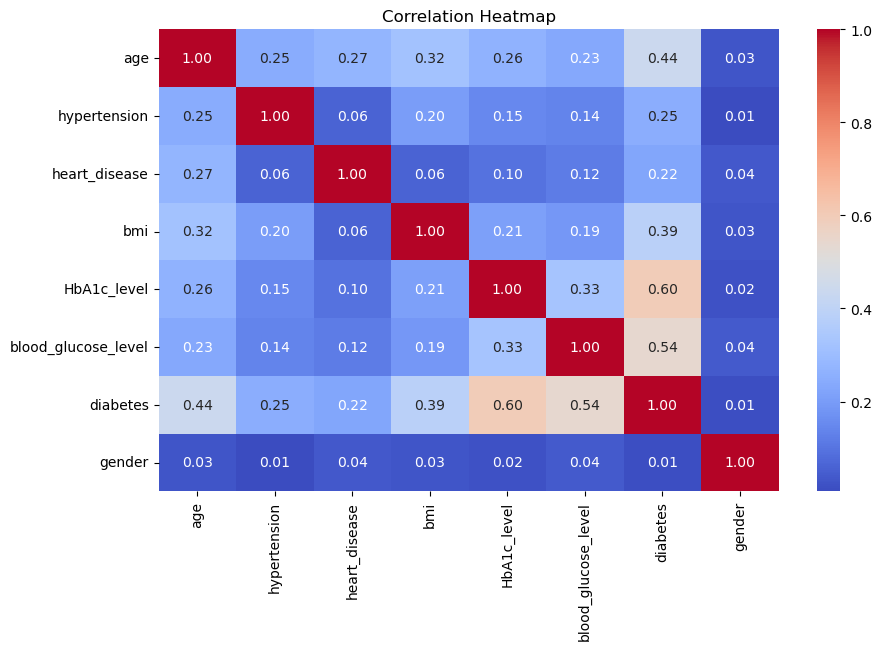

In [271]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Traning Models

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [273]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=df['diabetes'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [274]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=False)

print("---Logistic Regression---")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

---Logistic Regression---
Accuracy: 89.26174496644296
Precision: 0.8990825688073395
Recall: 0.8235294117647058
F1 Score: 0.8596491228070176
Confusion Matrix:
 [[168  11]
 [ 21  98]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       179
         1.0       0.90      0.82      0.86       119

    accuracy                           0.89       298
   macro avg       0.89      0.88      0.89       298
weighted avg       0.89      0.89      0.89       298



### Decision Tree

In [275]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt) * 100
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)
cr = classification_report(y_test, y_pred_dt, output_dict=False)

print("---Decision Tree---")
print("Accuracy:", round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", round(recall,2))
print("F1 Score:", round(f1,2))
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

---Decision Tree---
Accuracy: 88.59
Precision: 0.87
Recall: 0.84
F1 Score: 0.85
Confusion Matrix:
 [[164  15]
 [ 19 100]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       179
         1.0       0.87      0.84      0.85       119

    accuracy                           0.89       298
   macro avg       0.88      0.88      0.88       298
weighted avg       0.89      0.89      0.89       298



### Random forest

In [276]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf) * 100
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)
cr = classification_report(y_test, y_pred_rf, output_dict=False)

print("---Random Forest---")
print("Accuracy:", round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", round(recall,2))
print("F1 Score:", round(f1,2))
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

---Random Forest---
Accuracy: 93.96
Precision: 0.96
Recall: 0.88
F1 Score: 0.92
Confusion Matrix:
 [[175   4]
 [ 14 105]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       179
         1.0       0.96      0.88      0.92       119

    accuracy                           0.94       298
   macro avg       0.94      0.93      0.94       298
weighted avg       0.94      0.94      0.94       298



### SVM

In [277]:
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_svm) * 100
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
cm = confusion_matrix(y_test, y_pred_svm)
cr = classification_report(y_test, y_pred_svm, output_dict=False)

print("---SVM---")
print("Accuracy:", round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", round(recall,2))
print("F1 Score:", round(f1,2))
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

---SVM---
Accuracy: 89.93
Precision: 0.92
Recall: 0.82
F1 Score: 0.87
Confusion Matrix:
 [[170   9]
 [ 21  98]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       179
         1.0       0.92      0.82      0.87       119

    accuracy                           0.90       298
   macro avg       0.90      0.89      0.89       298
weighted avg       0.90      0.90      0.90       298



### XGBoost

In [278]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_xgb) * 100
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
cm = confusion_matrix(y_test, y_pred_xgb)
cr = classification_report(y_test, y_pred_xgb, output_dict=False)

# Print results
print("---XGBoost---")
print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1 Score:", round(f1, 2))
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

---XGBoost---
Accuracy: 91.61
Precision: 0.9
Recall: 0.89
F1 Score: 0.89
Confusion Matrix:
 [[167  12]
 [ 13 106]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       179
         1.0       0.90      0.89      0.89       119

    accuracy                           0.92       298
   macro avg       0.91      0.91      0.91       298
weighted avg       0.92      0.92      0.92       298



Random Forest is Best performing

#### USING CV TO DETERMINE IDEAL VALUE OF N_ESTIMATORS FOR RANDOM FOREST

In [282]:
param_grid = {'n_estimators': [100, 200, 250, 300, 350, 400, 500]}
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Grid Search Results:")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

Grid Search Results:
Best Parameters: {'n_estimators': 250}
Best Cross-Validated Accuracy: 0.9006772329184839


In [280]:
rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf) * 100
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)
cr = classification_report(y_test, y_pred_rf, output_dict=False)

print("---Random Forest---")
print("Accuracy:", round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", round(recall,2))
print("F1 Score:", round(f1,2))
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

---Random Forest---
Accuracy: 92.95
Precision: 0.95
Recall: 0.87
F1 Score: 0.91
Confusion Matrix:
 [[173   6]
 [ 15 104]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       179
         1.0       0.95      0.87      0.91       119

    accuracy                           0.93       298
   macro avg       0.93      0.92      0.93       298
weighted avg       0.93      0.93      0.93       298



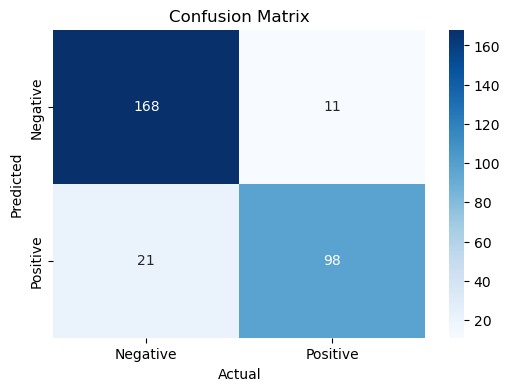

In [281]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
